In [4]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
path = "/kaggle/input/utkface-new/UTKFace"
images = []
age = []
gender = []
for img in os.listdir(path):
  ages = img.split("_")[0]
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))
  
age = np.array(age,dtype=np.int64)
images = np.array(images)   #Forgot to scale image for my training. Please divide by 255 to scale. 
gender = np.array(gender,np.uint64)

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [7]:
#Define age model and train. 
age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200,200,3)))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))
              
age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))
              
age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())              
                           
history_age = age_model.fit(x_train_age, y_train_age,
                        validation_data=(x_test_age, y_test_age), epochs=50)

age_model.save('age_model_50epochs.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ age (Dense)                     │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,861,185 (87.21 MB)

 Trainable params: 22,861,185 (87.21 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50


I0000 00:00:1727018563.323145     220 service.cc:145] XLA service 0x7cc240005eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727018563.323199     220 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  3/556 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 11066655.0000 - mae: 1754.0262

I0000 00:00:1727018571.399762     220 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


556/556 ━━━━━━━━━━━━━━━━━━━━ 52s 76ms/step - loss: 422555.2812 - mae: 83.2218 - val_loss: 257.1957 - val_mae: 12.2498
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 264.0523 - mae: 12.4353 - val_loss: 200.7231 - val_mae: 10.7825
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 205.7578 - mae: 10.8145 - val_loss: 167.6220 - val_mae: 9.4654
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 174.9677 - mae: 9.9102 - val_loss: 162.0408 - val_mae: 9.5556
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 151.6554 - mae: 9.2008 - val_loss: 140.7762 - val_mae: 8.7684
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 140.6056 - mae: 8.8435 - val_loss: 135.3160 - val_mae: 8.4596
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 133.3252 - mae: 8.6727 - val_loss: 134.4234 - val_mae: 8.3419
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 128.5807 - mae: 8.4583 - val_loss: 147.4491 - val_mae: 8.7931
Epoch 9/50



KeyboardInterrupt



In [8]:
history_age = age_model.fit(x_train_age, y_train_age,
                        validation_data=(x_test_age, y_test_age), epochs=50)

age_model.save('age_model_100epochs.h5')

Epoch 1/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - loss: 32.8855 - mae: 4.3315 - val_loss: 97.3153 - val_mae: 7.1304
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 35.6360 - mae: 4.4843 - val_loss: 97.5118 - val_mae: 6.8832
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 33.4971 - mae: 4.3526 - val_loss: 95.0810 - val_mae: 7.0790
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 34.3613 - mae: 4.3840 - val_loss: 93.7037 - val_mae: 6.7999
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 31.6359 - mae: 4.2540 - val_loss: 90.3628 - val_mae: 6.7955
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 30.6737 - mae: 4.1759 - val_loss: 90.3449 - val_mae: 6.7983
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 33.3501 - mae: 4.3617 - val_loss: 90.5870 - val_mae: 6.7302
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - loss: 29.4715 - mae: 4.0756 - val_loss: 92.5360 - val_mae: 6.8309
Epoch 9/50
556/556 ━━━━━

In [9]:
#Define gender model and train
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')

Epoch 1/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6534 - loss: 2.7777 - val_accuracy: 0.8252 - val_loss: 0.3880
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8052 - loss: 0.4214 - val_accuracy: 0.8368 - val_loss: 0.3764
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8287 - loss: 0.3673 - val_accuracy: 0.8429 - val_loss: 0.3451
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8410 - loss: 0.3469 - val_accuracy: 0.8573 - val_loss: 0.3185
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.8590 - loss: 0.3203 - val_accuracy: 0.8520 - val_loss: 0.3172
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8653 - loss: 0.3113 - val_accuracy: 0.8573 - val_loss: 0.3233
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8635 - loss: 0.3069 - val_accuracy: 0.8703 - val_loss: 0.2868
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8731 - loss: 0.2868 - 

In [10]:
history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=10)

Epoch 1/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9529 - loss: 0.1103 - val_accuracy: 0.8971 - val_loss: 0.3456
Epoch 2/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9540 - loss: 0.1050 - val_accuracy: 0.8919 - val_loss: 0.3254
Epoch 3/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9490 - loss: 0.1201 - val_accuracy: 0.8886 - val_loss: 0.3709
Epoch 4/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9500 - loss: 0.1240 - val_accuracy: 0.8856 - val_loss: 0.4418
Epoch 5/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9564 - loss: 0.1087 - val_accuracy: 0.8721 - val_loss: 0.3934
Epoch 6/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9524 - loss: 0.1156 - val_accuracy: 0.8873 - val_loss: 0.3977
Epoch 7/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9519 - loss: 0.1099 - val_accuracy: 0.8957 - val_loss: 0.3800
Epoch 8/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9559 - loss: 0.1008 - 

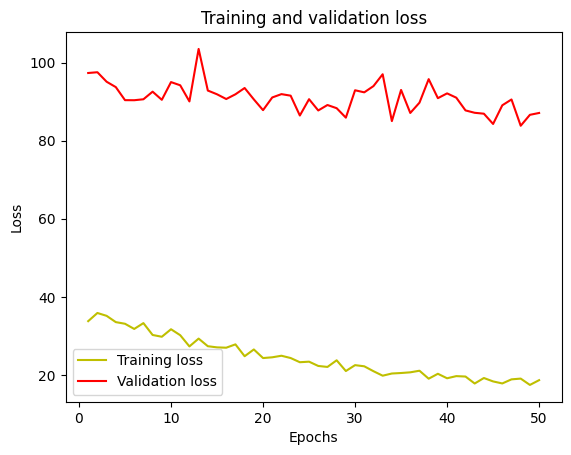

In [11]:
history = history_age

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

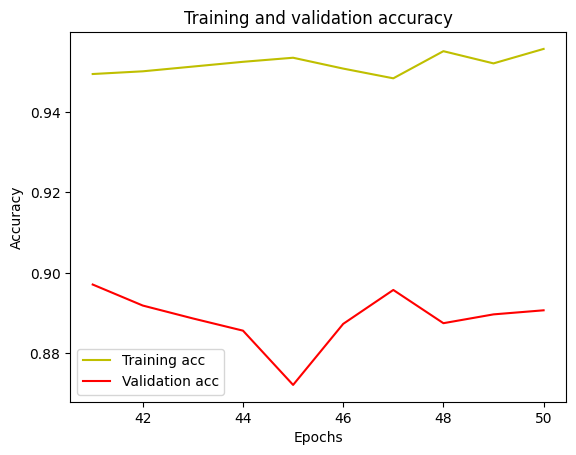

In [15]:
acc = history_gender.history['accuracy']
val_acc = history_gender.history['val_accuracy']
plt.plot(epochs[-10:], acc, 'y', label='Training acc')
plt.plot(epochs[-10:], val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy =  0.8921882908722794


<Axes: >

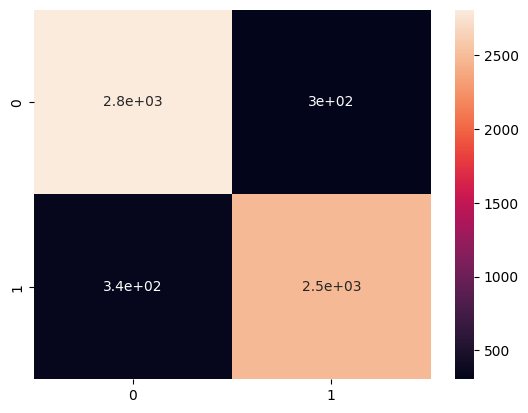

In [14]:
from keras.models import load_model
#Test the model
my_model = load_model('gender_model_50epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)